In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
df= pd.read_csv("weather_linear_regression_10000.csv")
print(df.isnull().sum())

date                   0
humidity_percent       0
pressure_hpa           0
wind_speed_kmph        0
cloud_cover_percent    0
rainfall_mm            0
sunshine_hours         0
temperature_c          0
dtype: int64


In [49]:
X = df.drop(columns=["date","temperature_c"])
y = df["temperature_c"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9576473695972922
MSE: 2.210319414704797


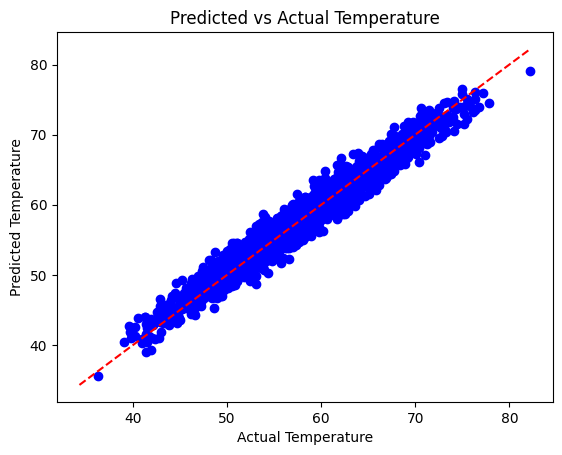

In [51]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Predicted vs Actual Temperature")
plt.show()